In [3]:
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import torchvision, cv2
from utils.visualizations import *
from utils.transforms import *
from utils.dataset import AmbientaDataset, PhysionetDataset, classes

In [8]:
from utils.transforms import *
from utils.visualizations import *
from pathlib import Path
import utils.transforms as tf
import utils.visualizations as vi
import importlib
importlib.reload(tf)
importlib.reload(vi)

from os import listdir
from os.path import isfile, join
#files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data = []
labels = [] # 0 = supine, 1 = left, 2 = right
for subj in range(1, 103):
    data.append([])
    labels.append([])
    for type in ["cover1", "cover2", "uncover"]:
        for pos in range(1, 46):
            file_data = np.load(f'data/SLP-raw/danaLab/00{str(subj).zfill(3)}/PMarray/{type}/0000{str(pos).zfill(2)}.npy')
            data[subj-1].append(file_data)
            if pos <= 15:
                labels[subj-1].append(0)
            elif pos <= 30:
                labels[subj-1].append(1)
            else:
                labels[subj-1].append(2)
data = np.asarray(data)
labels = np.asarray(labels)
Path("data").joinpath("SLP").mkdir(parents=True, exist_ok=True)
np.save("data/SLP/data.npy", data)
np.save("data/SLP/labels.npy", labels)

(102, 135, 192, 84)
(102, 135)


<AxesSubplot:>

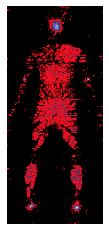

In [9]:
data = np.load("slp_data.npy")
labels = np.load("slp_labels.npy")
print(data.shape)
print(labels.shape)
plot_image(data[0][0])

In [10]:
print(np.reshape(data, (-1, *data.shape[2:])).shape)

(13770, 192, 84)


In [3]:
import utils.dataset as ds
import importlib
importlib.reload(ds)

ds.PhysionetDataset.reload_data_from_source()

Reading Files: [------------------------------------------------------] 221/221


(12756, 64, 32) (12756,)


<AxesSubplot:>

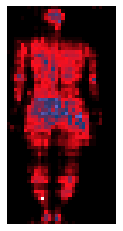

In [5]:
physionet = PhysionetDataset(train=True)

plot_image(physionet[0][0])

| Index | Joint          |
|-------|----------------|
| 0     | Right Ankle    |
| 1     | Right Knee     |
| 2     | Right Hip      |
| 3     | Left Hip       |
| 4     | Left Knee      |
| 5     | Left Ankle     |
| 6     | Right Wrist    |
| 7     | Right Elbow    |
| 8     | Right Shoulder |
| 9     | Left Shoulder  |
| 10    | Left Elbow     |
| 11    | Left Wrist     |
| 12    | Thorax         |
| 13    | Head Top       |

In [34]:
import scipy.io
from enum import IntEnum

X = 0
Y = 1

class JointIndex(IntEnum):
    RIGHTANKLE = 0
    RIGHTKNEE = 1
    RIGHTHIP = 2
    LEFTHIP=3
    LEFTKNEE=4
    LEFTANKLE=5
    RIGHTWRIST=6
    RIGHTELBOW=7
    RIGHTSHOULDER=8
    LEFTSHOULDER=9
    LEFTELBOW=10
    LEFTWRIST=11
    THORAX=12
    HEADTOP=13  

mat = scipy.io.loadmat('SLP/danaLab/00001/joints_gt_IR.mat')
skelli = mat["joints_gt"]

skelli = skelli[:2, :, 30]
skelli = np.swapaxes(skelli, axis1=0, axis2=1)
print(skelli)
print(skelli.shape)

supine_hip_width = 15
supine_shoulder_width = 20

hip_is_thin = abs(skelli[JointIndex.LEFTHIP][X] - skelli[JointIndex.RIGHTHIP][X]) < supine_hip_width
shoulder_is_thin = abs(skelli[JointIndex.LEFTSHOULDER][X] - skelli[JointIndex.RIGHTSHOULDER][X]) < supine_shoulder_width
right_arm_pointing_right = skelli[JointIndex.RIGHTSHOULDER][X] < skelli[JointIndex.RIGHTWRIST][X]
left_arm_pointing_right = skelli[JointIndex.LEFTSHOULDER][X] < skelli[JointIndex.LEFTWRIST][X]

print(hip_is_thin)
print(shoulder_is_thin)
print(right_arm_pointing_right)
print(left_arm_pointing_right)

[[ 57.60843373 113.27108434]
 [ 37.7381835   92.21455051]
 [ 60.27757183  72.93744208]
 [ 62.65013902  74.42029657]
 [ 39.221038    92.80769231]
 [ 58.20157553 112.67794254]
 [ 50.49073216  25.78266914]
 [ 38.6278962   40.90778499]
 [ 50.78730306  34.97636701]
 [ 55.23586654  30.82437442]
 [ 62.94670992  57.21918443]
 [ 65.61584801  74.12372567]
 [ 52.56672845  30.52780352]
 [ 49.89759036  13.91983318]]
(14, 2)
True
True
False
True
